In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras import layers

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
labels = unpickle("cifar-10-batches-py/batches.meta")

In [ ]:
labels = labels[b'label_names']

In [ ]:
data = unpickle("cifar-10-batches-py/data_batch_1")

In [ ]:
images = data[b'data']

In [ ]:
train_labels = data[b'labels']

In [ ]:
imgred = np.reshape(images[5][:1024], (32,32))
imgblue = np.reshape(images[5][1024:2048], (32,32))
imggreen = np.reshape(images[5][2048:3072], (32,32))

In [ ]:
sample_image = np.dstack((imgred,imgblue, imggreen))

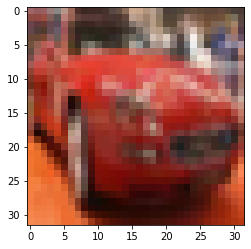

In [ ]:
plt.figure()
plt.imshow(sample_image)
plt.grid(False)
plt.show()


In [ ]:
labels[train_labels[5]]

b'automobile'

In [ ]:
train_images = []
for i in range(10000):
    imgred = np.reshape(images[i][:1024], (32,32))
    imgblue = np.reshape(images[i][1024:2048], (32,32))
    imggreen = np.reshape(images[i][2048:3072], (32,32))
    a = np.dstack((imgred,imgblue, imggreen))
    train_images.append(a)

In [ ]:
train_images = np.array(train_images) #this np array holds all images in proper form

In [ ]:
train_images = train_images / 255.0

array([0.23137255, 0.24313725, 0.24705882])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(728, activation="relu"),
    keras.layers.Dense(1024, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="adam",
             loss='mse',
             metrics=['accuracy'])

In [ ]:
train_labels = np.array(train_labels)

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
313/313 [==============================] - 3s 10ms/step - loss: 20.5198 - accuracy: 0.0991
Epoch 2/10
313/313 [==============================] - 3s 10ms/step - loss: 20.4879 - accuracy: 0.1005
Epoch 3/10
313/313 [==============================] - 3s 10ms/step - loss: 20.4879 - accuracy: 0.1005
Epoch 4/10
313/313 [==============================] - 3s 10ms/step - loss: 20.4879 - accuracy: 0.1005
Epoch 5/10
313/313 [==============================] - 3s 9ms/step - loss: 20.4879 - accuracy: 0.1005
Epoch 6/10
313/313 [==============================] - 3s 10ms/step - loss: 20.4879 - accuracy: 0.1005
Epoch 7/10
313/313 [==============================] - 3s 10ms/step - loss: 20.4879 - accuracy: 0.1005
Epoch 8/10
313/313 [==============================] - 3s 10ms/step - loss: 20.4879 - accuracy: 0.1005
Epoch 9/10
313/313 [==============================] - 3s 10ms/step - loss: 20.4879 - accuracy: 0.1005
Epoch 10/10
313/313 [==============================] - 3s 10ms/step - loss: 20.4879

In [ ]:
import ssl

In [ ]:
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import np_utils

In [ ]:
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer="adam",
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')

In [ ]:
x_train = x_train / 255.0

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 523s 1s/step - loss: 1.5776 - accuracy: 0.4213
Epoch 2/10
391/391 [==============================] - 516s 1s/step - loss: 1.1000 - accuracy: 0.6102
Epoch 3/10
391/391 [==============================] - 514s 1s/step - loss: 0.9233 - accuracy: 0.6785
Epoch 4/10
391/391 [==============================] - 513s 1s/step - loss: 0.8186 - accuracy: 0.7133
Epoch 5/10
391/391 [==============================] - 512s 1s/step - loss: 0.7302 - accuracy: 0.7473
Epoch 6/10
391/391 [==============================] - 509s 1s/step - loss: 0.6672 - accuracy: 0.7664
Epoch 7/10
391/391 [==============================] - 510s 1s/step - loss: 0.6129 - accuracy: 0.7845
Epoch 8/10
391/391 [==============================] - 494s 1s/step - loss: 0.5589 - accuracy: 0.8050
Epoch 9/10
391/391 [==============================] - 503s 1s/step - loss: 0.5124 - accuracy: 0.8184
Epoch 10/10
391/391 [==============================] - 522s 1s/step - loss: 0.4814 - accura